In [4]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

df = pd.read_csv(url).fillna(0)

df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
15851,22,0.0
15852,23,0.0
15853,24,0.0
15854,25,0.0
15855,26,0.0
15856,27,0.0
15857,28,0.0
15858,29,0.0
15859,30,0.0
15860,31,0.0


In [5]:
x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1]) 
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [675.06635342]
Independent term: 
 -49838.6912495414


In [6]:
y_prediccion = regr.predict([[350]])
print(int(y_prediccion))

186434


[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 34

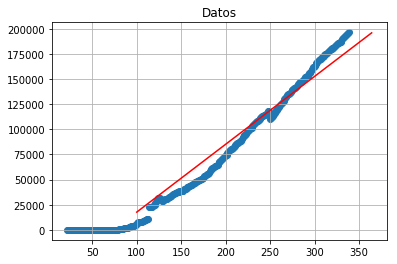

In [8]:
plt.scatter(x, y)
x_real = np.array(range(100, 365))
print(x_real)
plt.title('Datos')
plt.grid(True)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red')
plt.show()

# Conclusion 
Gracias a la regresión lineal podemos tener una idea clara acerca del comportamiento de los eventos sucedidos a lo largo de un determinado tiempo, los metodos de regresión son utiles incluso para predecir dichos eventos en un futuro cercano, estas prediccciones nos permiten tomar desiciones optimas en momentos dados.